In [29]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df1 = pd.DataFrame([['2022-01-03', 1000], 
                    ['2022-01-04', 1100], 
                    ['2022-01-05', 1200], 
                    ['2022-01-06', 1100], 
                    ['2022-01-07', 1000], 
                    ['2022-01-10', 1100]], columns=['date', 'price'])
df2 = pd.DataFrame([['2022-01-03', '판다전자', 1000], 
                    ['2022-01-03', '파이닉스', 9500], 
                    ['2022-01-04', '판다전자', 1100], 
                    ['2022-01-04', '파이닉스', 9000], 
                    ['2022-01-05', '판다전자', 1200],
                    ['2022-01-05', '파이닉스', 9900]], 
                   columns=['date', '종목명', 'price'])
df3 = df1.copy()

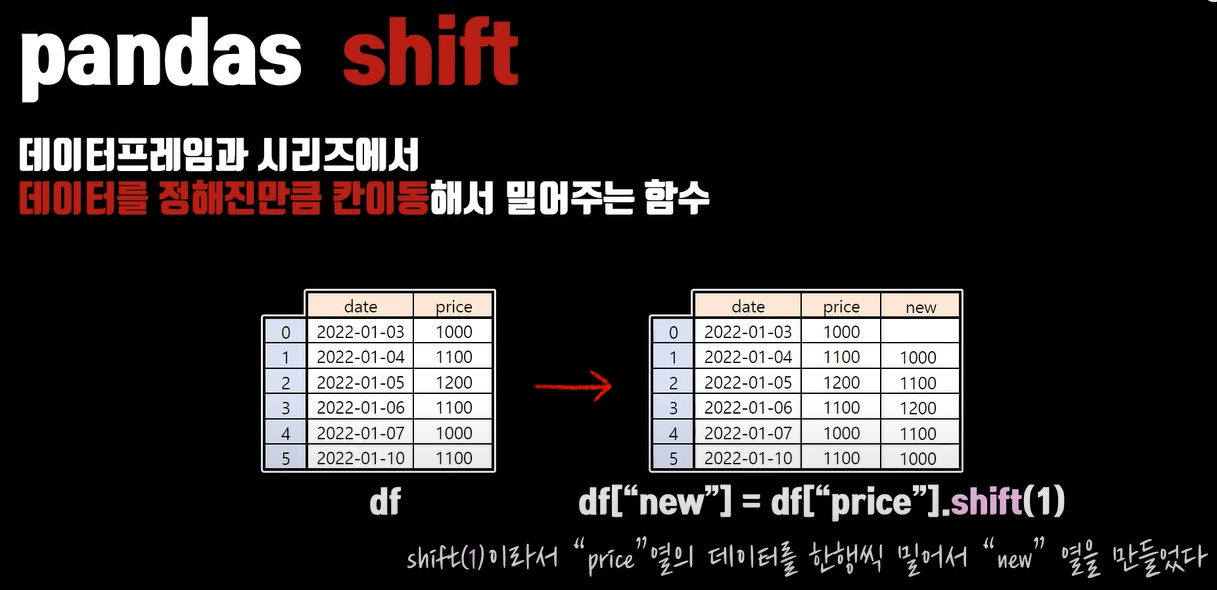

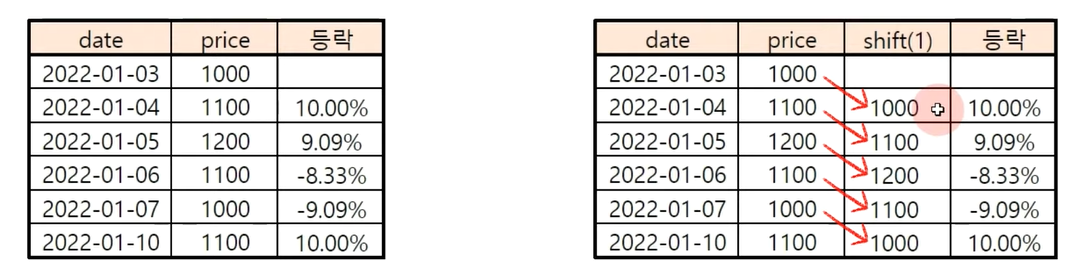

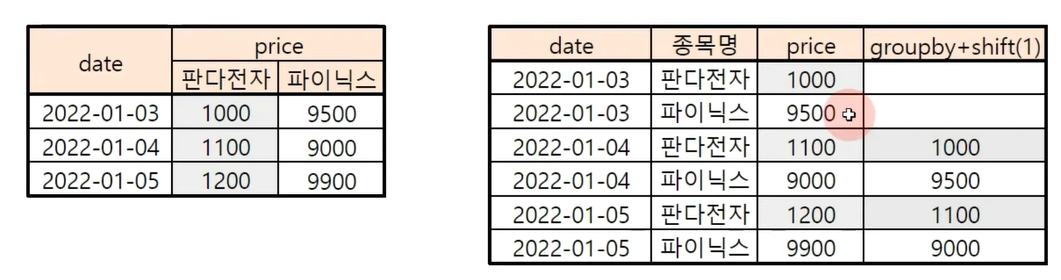

In [30]:
df1

,date,price
0,2022-01-03,1000
1,2022-01-04,1100
2,2022-01-05,1200
3,2022-01-06,1100
4,2022-01-07,1000
5,2022-01-10,1100


In [31]:
df1.shift(1)

,date,price
0,NaN,NaN
1,2022-01-03,1000.00
2,2022-01-04,1100.00
3,2022-01-05,1200.00
4,2022-01-06,1100.00
5,2022-01-07,1000.00


In [32]:
df1.shift(2)

,date,price
0,NaN,NaN
1,NaN,NaN
2,2022-01-03,1000.00
3,2022-01-04,1100.00
4,2022-01-05,1200.00
5,2022-01-06,1100.00


In [33]:
df1.shift(-1)

,date,price
0,2022-01-04,1100.00
1,2022-01-05,1200.00
2,2022-01-06,1100.00
3,2022-01-07,1000.00
4,2022-01-10,1100.00
5,NaN,NaN


In [34]:
df1.shift(1, axis=1)
# 열이 한칸 밀림

,date,price
0,NaN,2022-01-03
1,NaN,2022-01-04
2,NaN,2022-01-05
3,NaN,2022-01-06
4,NaN,2022-01-07
5,NaN,2022-01-10


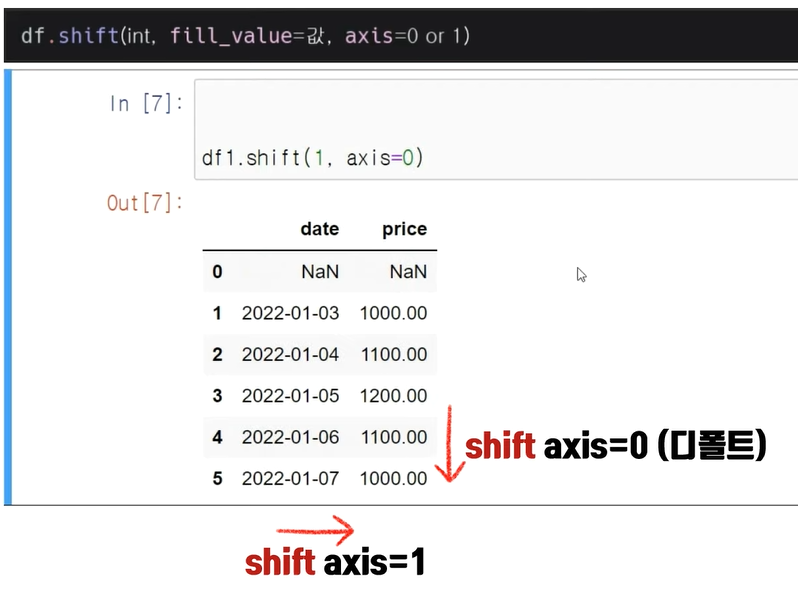

In [35]:
df1.shift(1, fill_value="없음")

,date,price
0,없음,없음
1,2022-01-03,1000
2,2022-01-04,1100
3,2022-01-05,1200
4,2022-01-06,1100
5,2022-01-07,1000


In [36]:
df1["price"].shift(1)

0       NaN
1   1000.00
2   1100.00
3   1200.00
4   1100.00
5   1000.00
Name: price, dtype: float64

In [37]:
df1["shit(1)"] = df1["price"].shift(1)
df1

,date,price,shit(1)
0,2022-01-03,1000,NaN
1,2022-01-04,1100,1000.00
2,2022-01-05,1200,1100.00
3,2022-01-06,1100,1200.00
4,2022-01-07,1000,1100.00
5,2022-01-10,1100,1000.00


In [38]:
df1["등락"] = (df1["price"] - df1["shit(1)"]) / df1["shit(1)"] 
df1

,date,price,shit(1),등락
0,2022-01-03,1000,NaN,NaN
1,2022-01-04,1100,1000.00,0.10
2,2022-01-05,1200,1100.00,0.09
3,2022-01-06,1100,1200.00,-0.08
4,2022-01-07,1000,1100.00,-0.09
5,2022-01-10,1100,1000.00,0.10


In [39]:
df1.drop("shit(1)", axis=1)

,date,price,등락
0,2022-01-03,1000,NaN
1,2022-01-04,1100,0.10
2,2022-01-05,1200,0.09
3,2022-01-06,1100,-0.08
4,2022-01-07,1000,-0.09
5,2022-01-10,1100,0.10


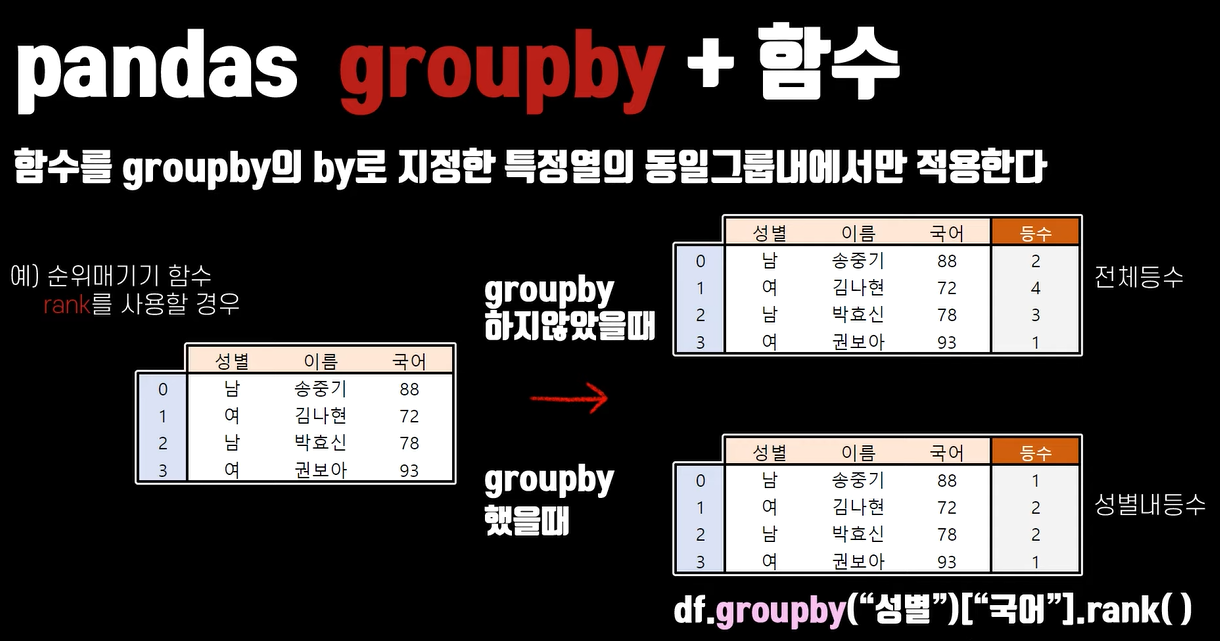

In [40]:
df2

,date,종목명,price
0,2022-01-03,판다전자,1000
1,2022-01-03,파이닉스,9500
2,2022-01-04,판다전자,1100
3,2022-01-04,파이닉스,9000
4,2022-01-05,판다전자,1200
5,2022-01-05,파이닉스,9900


In [41]:
df2.groupby("종목명")["price"].shift(1)

0       NaN
1       NaN
2   1000.00
3   9500.00
4   1100.00
5   9000.00
Name: price, dtype: float64

In [42]:
df2["shift"] = df2.groupby("종목명")["price"].shift(1)
df2

# 종목명에 맞춰서 쉬프트

,date,종목명,price,shift
0,2022-01-03,판다전자,1000,NaN
1,2022-01-03,파이닉스,9500,NaN
2,2022-01-04,판다전자,1100,1000.00
3,2022-01-04,파이닉스,9000,9500.00
4,2022-01-05,판다전자,1200,1100.00
5,2022-01-05,파이닉스,9900,9000.00


In [43]:
df3

,date,price
0,2022-01-03,1000
1,2022-01-04,1100
2,2022-01-05,1200
3,2022-01-06,1100
4,2022-01-07,1000
5,2022-01-10,1100


In [44]:
df3["price"].diff(1)
# 아래 위 한 칸 사이의 차이 값을 구함

0       NaN
1    100.00
2    100.00
3   -100.00
4   -100.00
5    100.00
Name: price, dtype: float64

In [45]:
df3["price"].pct_change(1)
# 아래 위 한 칸 사이의 퍼센트 값을 구함

0     NaN
1    0.10
2    0.09
3   -0.08
4   -0.09
5    0.10
Name: price, dtype: float64

In [46]:
df3["등락"] = df3["price"].pct_change(1)
df3

,date,price,등락
0,2022-01-03,1000,NaN
1,2022-01-04,1100,0.10
2,2022-01-05,1200,0.09
3,2022-01-06,1100,-0.08
4,2022-01-07,1000,-0.09
5,2022-01-10,1100,0.10
